In [1]:
#for manipulation
import numpy as np
import pandas as pd


In [2]:
#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#for interactivity
from ipywidgets import interact as itr


In [4]:
#read dataset
data = pd.read_csv('Crop_recommendation.csv')

In [5]:
#dataset shape
print("Shape of the dataset: ", data.shape)

Shape of the dataset:  (2200, 8)


In [6]:
data.head(200)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
195,90,57,24,18.928519,72.800861,6.158860,82.341629,maize
196,67,35,22,23.305468,63.246480,6.385684,108.760300,maize
197,60,54,19,18.748267,62.498785,6.417820,70.234016,maize
198,83,58,23,19.742133,59.662631,6.381202,65.508614,maize


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data['label'].value_counts()

maize          100
mothbeans      100
chickpea       100
orange         100
mungbean       100
jute           100
grapes         100
watermelon     100
mango          100
muskmelon      100
coffee         100
papaya         100
pigeonpeas     100
apple          100
lentil         100
kidneybeans    100
coconut        100
pomegranate    100
cotton         100
banana         100
blackgram      100
rice           100
Name: label, dtype: int64

In [30]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
print('Average ratio of nitrogen in the soil : {0:.1f}'.format(data['N'].mean()))
print('Average ratio of phosphorus in the soil : {0: .1f}'.format(data['P'].mean()))
print('Average ratio of potassium in the soil : {0:.1f}'.format(data['K'].mean()))
print('Average temperature in celsius : {0:.1f}'.format(data['temperature'].mean()))
print('Average relative humidity in % : {0:.1f}'.format(data['humidity'].mean()))
print('Average PH value of the soil: {0:.1f}'.format(data['ph'].mean()))
print('Average rainfall in mm: {0:.1f}'.format(data['rainfall'].mean()))

Average ratio of nitrogen in the soil : 50.6
Average ratio of phosphorus in the soil :  53.4
Average ratio of potassium in the soil : 48.1
Average temperature in celsius : 25.6
Average relative humidity in % : 71.5
Average PH value of the soil: 6.5
Average rainfall in mm: 103.5


In [10]:
@itr
def summary (crops = list (data[ 'label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("-----------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max())
    print("-----------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max())
    print("-----------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max())
    print("-----------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}" .format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}" .format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}" .format(x['temperature'].max()))
    print("-----------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}". format (x['humidity'].min()))
    print("Average Humidity required : {0:.2f}" .format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}" .format(x['humidity'].max()))
    print("-----------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("-----------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}" .format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}" .format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}" .format(x['rainfall' ].max()))

interactive(children=(Dropdown(description='crops', options=('maize', 'mothbeans', 'chickpea', 'orange', 'mung…

In [11]:
@itr
def compare (conditions = ['N', 'P','K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Average Value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
    print(" -")
    print("Rice {0:.2f}" .format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams: {0:.2f}".format(data[(data['label'] == 'banana')] [conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] ==  'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[ (data['label'] == 'coconut')][conditions].mean()))
    print("Apple {0:.2f}" .format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[ (data['label' ] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}" .format(data[data['label' ] == 'muskmelon'][conditions].mean()))
    print("Grapes: {0:.2f}" .format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}" .format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}" .format(data[ (data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans: {0:.2f}". format (data[data[ 'label'] == 'mungbean'][conditions].mean()))
    print("Oranges: {0:.2f}".format(data[ (data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas: {0:.2f}" .format(data[data[ 'label'] == 'chickpea'][conditions].mean()))
    print("Lentils: {0:.2f}" .format(data[ (data['label' ] == 'lentil')][conditions].mean()))
    print("Cotton {0:.2f}". format (data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize {0:.2f}".format(data[ (data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans: {0:.2f}" .format(data[data[ 'label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas: {0:.2f}" .format(data[ (data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango {0:.2f}". format (data[data[ 'label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}" .format(data[ (data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\Users\Aniket Anand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aniket Anand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aniket Anand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

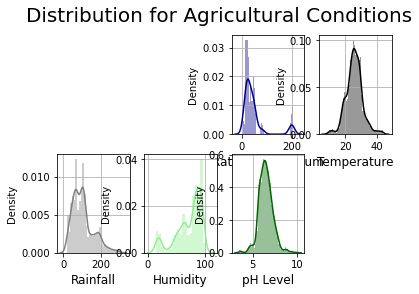

In [12]:
plt.subplot (2, 4, 3)
sns.distplot (data['K'], color = 'darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()
plt.subplot (2, 4, 4)
sns.distplot (data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()
plt.subplot (2, 4, 5)
sns.distplot (data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()
plt.subplot (2, 4, 6)
sns.distplot (data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()
plt.subplot (2, 4, 7)
sns.distplot (data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()
plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [13]:
print("Some Interesting Patterns")
print(".")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data [data['N'] > 120] ['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil: ", data[data['P'] > 100] ['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data [data['K'] > 200] ['label'].unique())
print("Crops which requires very High Rainfall: ", data [data['rainfall'] > 200] ['label'].unique())
print("Crops which requires very Low Temperature :", data [data['temperature'] <10]['label'].unique())
print("Crops which requires very High Temperature :", data [data['temperature'] > 40] ['label'].unique())
print("Crops which requires very Low Humidity:", data [data['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH: ", data [data['ph'] < 4]['label'].unique())
print("Crops which requires very High pH: ", data [data['ph'] > 9]['label'].unique())

Some Interesting Patterns
.
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil:  ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall:  ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH:  ['mothbeans']
Crops which requires very High pH:  ['mothbeans']


In [14]:
print("Summer Crops")
print (data[(data[ 'temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print(" -")
print("Winter Crops")
print (data[(data[ 'temperature'] <20) & (data['humidity'] > 30) ] ['label'].unique())
print("-- -")
print("Rainy Crops")
print (data[(data['rainfall'] > 200) & (data['humidity'] > 30) ]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
 -
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-- -
Rainy Crops
['rice' 'papaya' 'coconut']


In [15]:
from sklearn.cluster import KMeans

#remove labels as not required in unsupervised learning

x= data.drop(['label'],axis=1)

#selecting values

x=x.values

print(x.shape)


(2200, 7)


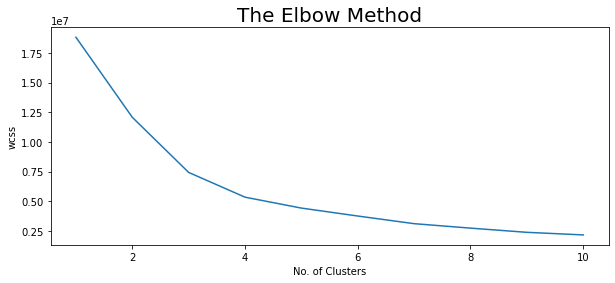

In [16]:
#optimum no of clusters
plt.rcParams['figure.figsize'] = (10, 4)
WCSS= []
for i in range(1, 11):
    km = KMeans (n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km. fit(x)
    WCSS.append(km. inertia_)
#Lets plot the results
plt.plot(range (1, 11), WCSS)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#ELBOW AT 3 and 4 and we choose 4 later one.

In [17]:
km = KMeans (n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Lets find out the Results
a = data['label' ]
y_means = pd.DataFrame (y_means)
z = pd.concat([y_means, a], axis = 1)
z = z. rename (columns = {0: 'cluster'})


#Lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print(". -")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label' ].unique())
print("--")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("-- ")
print("Crops in Forth uster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
. -
Crops in Second Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--
Crops in Third Cluster: ['grapes' 'apple']
-- 
Crops in Forth uster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


In [18]:
y=data['label']
x=data.drop(['label'],axis=1)

print('Shape of x:', x.shape)
print('Shape of y:', y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [19]:
#diving into training and testing set for AI model implementation

In [20]:
# Lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 0)
print("The Shape of x train:", x_train.shape)
print("The Shape of x test: ", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test: ", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test:  (440, 7)
The Shape of y train: (1760,)
The Shape of y test:  (440,)


In [21]:
#using logistic regression to built our model

In [22]:
from sklearn.linear_model import LogisticRegression as LR

model=LR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Aniket Anand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#testing our model

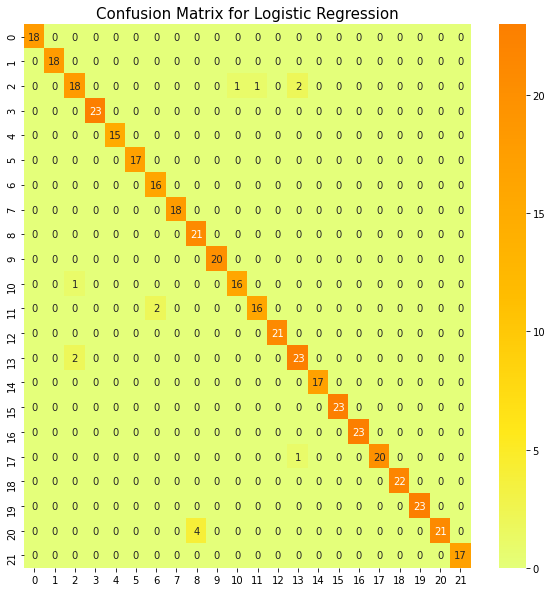

In [24]:
from sklearn.metrics import confusion_matrix
#Lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

In [25]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [26]:
#recall and precision value is high so our model is very accurate.

In [27]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [28]:
prediction = model.predict((np. array([[10,
40,
10,
45,
5,
4,
100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction) 

The Suggested Crop for Given Climatic Condition is : ['mothbeans']
